In [37]:
import numpy as np
import matplotlib.pyplot as plt
import quimb as qu

In [38]:
X=np.array([[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0]])

In [39]:
Z=qu.pauli('Z')

In [40]:
def op(L):
    a=0
    for i in range(L):
        a=a+(np.kron(np.eye(2**i),np.kron(Z,np.eye(2**(L-1-i)))))
    return(a)
    
def mag(L):
    m=[]
    I=np.eye(2**L)
    for x in range(2**L):
        psi=I[:,x]
        mg=np.dot(np.transpose(psi),np.dot(op(L),psi))
        m.append(mg)
    l=[-1*i for i in m]
    x=np.argsort(l)
    return(x)     


def P1(L):
    arr=np.eye(2**L)
    p1=np.zeros((2**L,2**L))
    x=mag(L)
    for i in range(len(x)):
        p1[i,:]=arr[x[i],:]
    return(p1)

def P2(magnetization,L):
    mlist=[]
    I=np.eye(2**L)
    for x in range(2**L):
        psi=I[:,x]
        psi=psi.reshape((2**L,1))
        mg=np.dot(np.transpose(psi),np.dot(op(L),psi))
        if mg==magnetization:
            mlist.append(psi)
    mlist2=[np.transpose(psi) for psi in mlist]
    
    mlistf=[np.dot(mlist[i],mlist2[i]) for i in range(len(mlist))]
        
    p2=sum(mlistf)
    
    return(p2)
    
    
    

In [41]:
L=3
magnetization=1

In [42]:
P=np.dot(X,np.dot(P1(L),P2(magnetization,L)))

H=qu.ham_heis(L,j=1,b=0,cyclic=False)


M=np.dot(P,np.dot(H,np.transpose(P)))

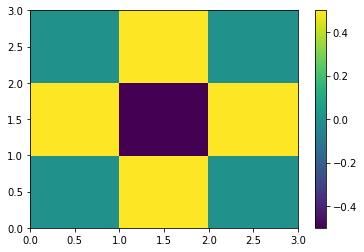

In [43]:
plt.pcolormesh(M)
plt.colorbar()